In [87]:
import pandas as pd
# Load the dataset
file_path = "superstore.csv"
df = pd.read_csv(file_path)
# Display basic info and first 5 rows
df.info(5), df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

(None,
           Category         City        Country Customer.ID     Customer.Name  \
 0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
 1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
 2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
 3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
 4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   
 
    Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
 0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
 1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
 2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
 3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
 4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-146969  ...     6   
 
     Segment           

In [5]:
# Step 1: Remove duplicates
df_cleaned = df.drop_duplicates()

# Step 2: Drop unnecessary columns
columns_to_drop = ["记录数", "Market2", "weeknum", "Row.ID"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Step 3: Convert date columns to datetime_
df_cleaned["Order.Date"] = pd.to_datetime(df_cleaned["Order.Date"], errors='coerce')
df_cleaned["Ship.Date"] = pd.to_datetime(df_cleaned["Ship.Date"], errors='coerce')

# Step 4: Handle outliers in Sales and Profit using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = remove_outliers_iqr(df_cleaned, "Sales")
df_cleaned = remove_outliers_iqr(df_cleaned, "Profit")

# Final cleaned dataset shape
df_cleaned.shape


(37703, 23)

In [7]:
# Step: Check and handle missing values
missing_summary = df_cleaned.isnull().sum()

# Filter only columns with missing values
missing_summary[missing_summary > 0]


Series([], dtype: int64)

In [11]:
import pandas as pd

# Assuming you've already loaded your cleaned data into df_cleaned
numeric_cols = ["Sales", "Profit", "Quantity", "Shipping.Cost"]

# Statistical summary
stats_summary = pd.DataFrame({
    "Mean": df_cleaned[numeric_cols].mean(),
    "Median": df_cleaned[numeric_cols].median(),
    "Standard Deviation": df_cleaned[numeric_cols].std(),
    "Variance": df_cleaned[numeric_cols].var()
})

# Display summary
print("Statistical Summary:\n", stats_summary)

# Correlation matrix
correlation_matrix = df_cleaned[numeric_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Statistical Summary:
                     Mean  Median  Standard Deviation      Variance
Sales          88.502427   51.00          100.039151  10007.831827
Profit         10.755792    7.20           19.514843    380.829082
Quantity        3.095297    3.00            2.021151      4.085051
Shipping.Cost   9.595393    4.72           14.107422    199.019361

Correlation Matrix:
                   Sales    Profit  Quantity  Shipping.Cost
Sales          1.000000  0.400606  0.236747       0.759051
Profit         0.400606  1.000000  0.155049       0.304747
Quantity       0.236747  0.155049  1.000000       0.180055
Shipping.Cost  0.759051  0.304747  0.180055       1.000000


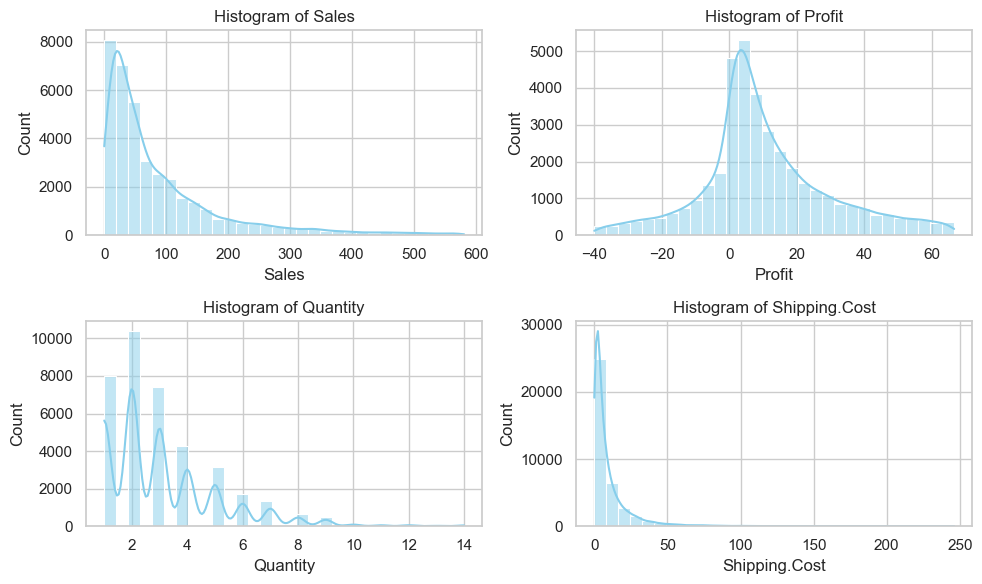

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_cols = ["Sales", "Profit", "Quantity", "Shipping.Cost"]

plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


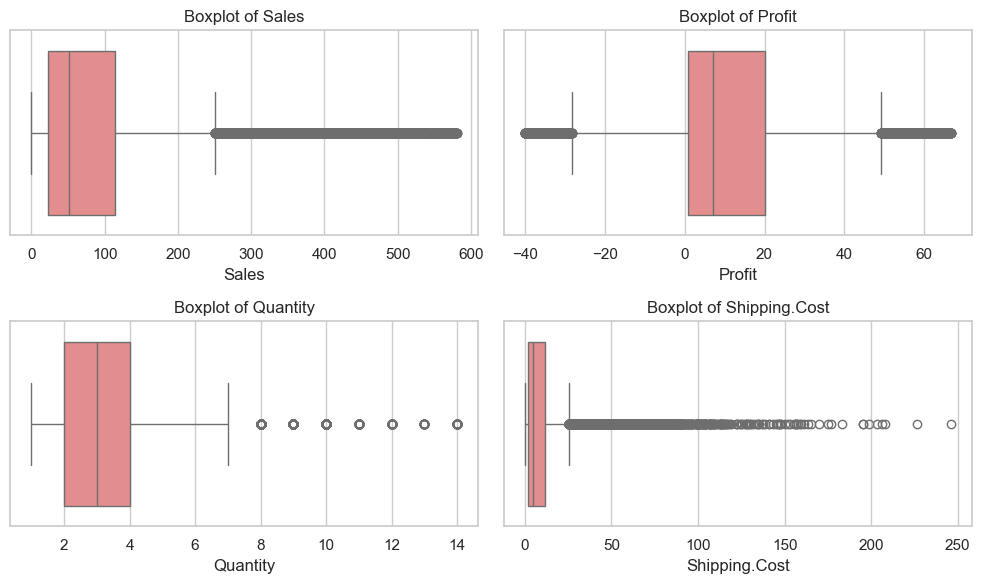

In [17]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df_cleaned[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


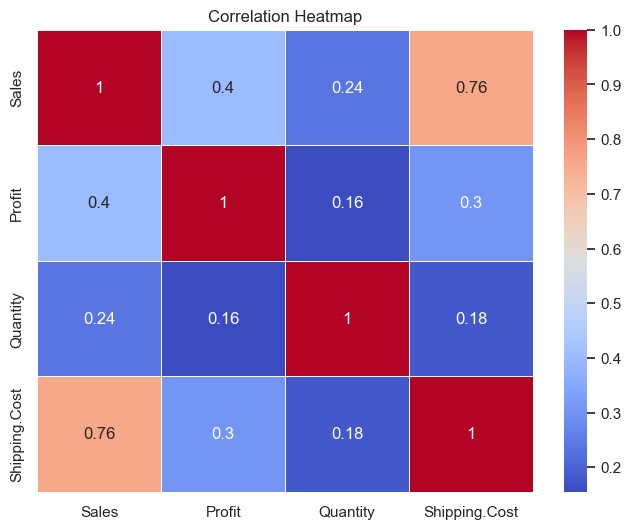

In [21]:
corr = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [47]:
import pandas as pd

# Load the original Superstore dataset
df = pd.read_csv("superstore.csv")  # Use correct path if needed

# Select relevant columns and rename
df_sales = df[[
    "Product.Name", "Region", "Sales", "Profit", "Discount", "Category", "Order.Date"
]].rename(columns={
    "Product.Name": "Product",
    "Order.Date": "Date"
})

# Save as sales_data.csv
df_sales.to_csv("sales_data.csv", index=False)
print(" File 'sales_data.csv' saved successfully.")


 File 'sales_data.csv' saved successfully.


In [51]:
# Load the cleaned dataset
df = pd.read_csv("sales_data.csv")

# Inspect the dataset
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)
print("Preview:\n", df.head())
# Summary statistics for numeric columns
print("\n📊 Summary Statistics:\n", df.describe())


Shape: (51290, 7)
Missing Values:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64
Data Types:
 Product      object
Region       object
Sales         int64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object
Preview:
                                              Product Region  Sales   Profit  \
0                                          Xerox 225   West     19   9.3312   
1          Wirebound Service Call Books, 5 1/2" x 4"   West     19   9.2928   
2  Adams Phone Message Book, Professional, 400 Me...   West     21   9.8418   
3                                         Xerox 1913   West    111  53.2608   
4                                          Xerox 223   West      6   3.1104   

   Discount         Category                     Date  
0       0.0  Office Supplies  2011-01-07 00:00:00.000  
1       0.0  Office Supplies  2011-01-21 00:00:00.000  
2       0.0  Office Supplies  2011

In [55]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sales_data.csv")

### 1. Remove Duplicates
df = df.drop_duplicates()
print(f" Dataset shape after removing duplicates: {df.shape}")

### 2. Fill Missing Values
# Numeric columns → fill with mean
numeric_cols = ["Sales", "Profit", "Discount"]
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

# Categorical columns → fill with placeholder
categorical_cols = ["Product", "Region", "Category"]
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("Unknown")

### 3. Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Final missing value check
print("\n🚨 Remaining Missing Values:\n", df.isnull().sum())




 Dataset shape after removing duplicates: (51274, 7)

🚨 Remaining Missing Values:
 Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


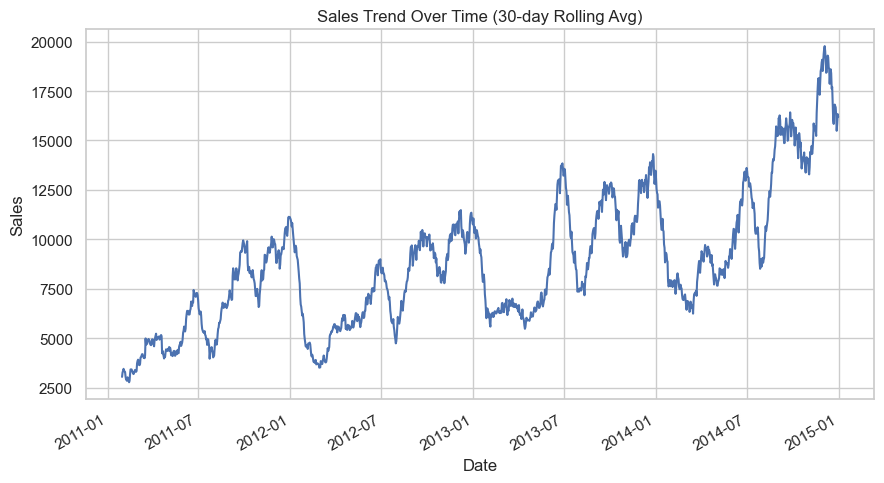

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
file_path = "superstore.csv"  # Use your actual path here
df = pd.read_csv(file_path)

# Select and rename relevant columns
df_eda = df[[
    "Product.Name", "Region", "Sales", "Profit", "Discount", "Category", "Order.Date"
]].rename(columns={
    "Product.Name": "Product",
    "Order.Date": "Date"
})

# Convert Date column to datetime
df_eda["Date"] = pd.to_datetime(df_eda["Date"], errors='coerce')

# Set plot style
sns.set(style="whitegrid")

# Time Series Plot: Sales over time (30-day rolling average)
plt.figure(figsize=(9, 5))
df_eda.groupby("Date")["Sales"].sum().rolling(window=30).mean().plot()
plt.title("Sales Trend Over Time (30-day Rolling Avg)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


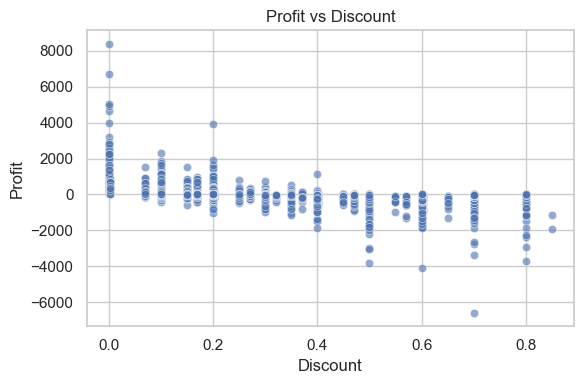

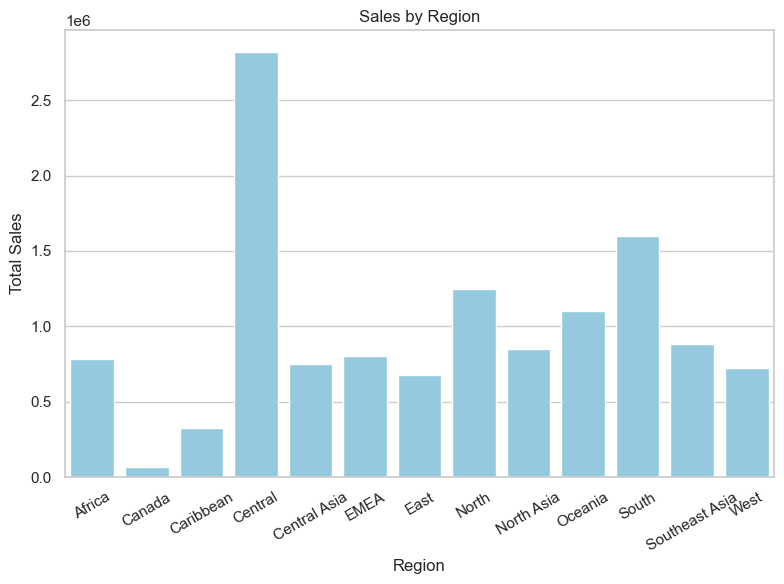

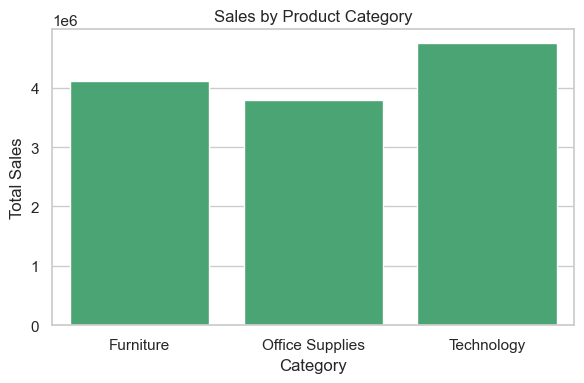

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
df = pd.read_csv("superstore.csv")
df_eda = df[[
    "Product.Name", "Region", "Sales", "Profit", "Discount", "Category", "Order.Date"
]].rename(columns={"Product.Name": "Product", "Order.Date": "Date"})
df_eda["Date"] = pd.to_datetime(df_eda["Date"], errors="coerce")

sns.set(style="whitegrid")
plt.rcParams["figure.autolayout"] = True  # Prevent layout warnings

# 2. Scatter Plot: Profit vs Discount
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_eda, x="Discount", y="Profit", alpha=0.6)
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

# 3. Bar Plot: Sales by Region (single color, rotated x-axis labels)
region_sales = df_eda.groupby("Region", as_index=False)["Sales"].sum()
plt.figure(figsize=(8, 6))
sns.barplot(data=region_sales, x="Region", y="Sales", color="skyblue")
plt.title("Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=30)  # <-- Rotate x-axis labels to prevent overlap
plt.tight_layout()       # <-- Adjust layout to prevent cutoff
plt.show()


# 4. Bar Plot: Sales by Product Category
category_sales = df_eda.groupby("Category", as_index=False)["Sales"].sum()
plt.figure(figsize=(6, 4))
sns.barplot(data=category_sales, x="Category", y="Sales", color="mediumseagreen")
plt.title("Sales by Product Category")
plt.ylabel("Total Sales")
plt.xlabel("Category")
plt.show()


🔍 Model: Linear Regression
Model Coefficients: [  1.49036295 175.31119854]
Intercept: 177.69252951610355
R² Score: 0.11428823787896436
MAE: 223.65981703793338
RMSE: 491.57157800500835


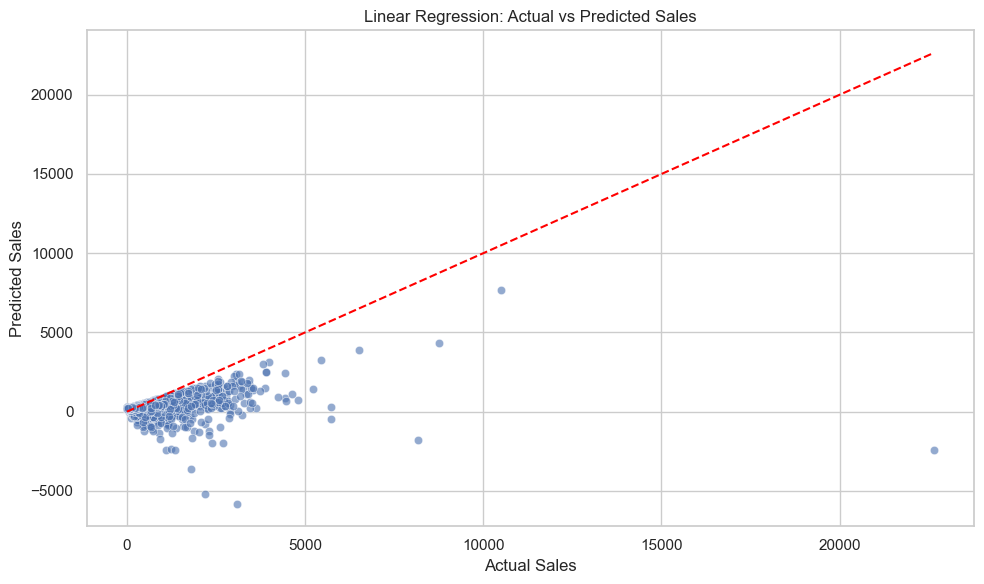

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("superstore.csv")

# Select relevant columns and drop missing values
df_model = df[["Sales", "Profit", "Discount"]].dropna()

# Define features and target variable
X = df_model[["Profit", "Discount"]]
y = df_model["Sales"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation results
print("🔍 Model: Linear Regression")
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

# Plot: Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()
